In [2]:
#1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results


In [1]:
import numpy as np
from scipy.stats import norm

# Sample data
sample_data = np.array([25, 30, 28, 27, 26, 29, 31, 24, 23, 22])
population_mean = 26
population_std = 3  # Known population standard deviation

# Calculate sample mean and size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Z-test formula
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

# Interpret results
alpha = 0.05
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

Z-score: 0.5270462766947299
P-value: 0.5981614526835282
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [5]:
#2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python


In [3]:
import numpy as np
from scipy.stats import ttest_1samp

# Simulate random data
np.random.seed(42)
sample_data = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, Sample size=30
population_mean = 50

# Perform one-sample t-test (for small samples, use t-test instead of Z-test)
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Interpret results
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

T-statistic: -1.145017367038331
P-value: 0.2615641461880146
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [6]:
#3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean

In [7]:
import numpy as np
from scipy.stats import norm

# Sample data
sample_data = np.array([102, 105, 98, 97, 100, 101, 99, 104, 103, 100])
population_mean = 100
population_std = 2  # Known population standard deviation

# Calculate sample mean and size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Z-test formula
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

# Interpret results
alpha = 0.05
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

Z-score: 1.4230249470757796
P-value: 0.15472892348537592
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [8]:
#4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot


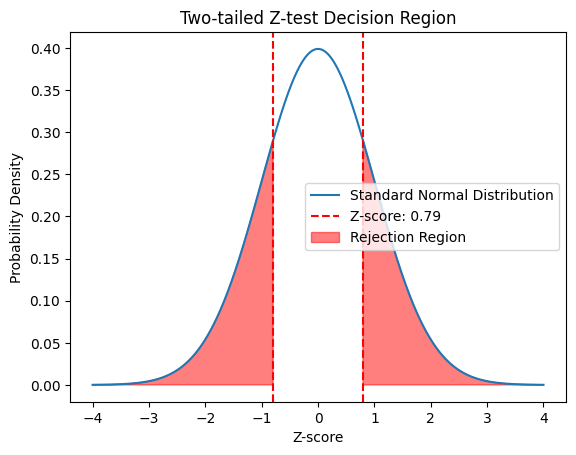

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data
sample_data = np.array([15, 17, 16, 18, 14, 19, 16, 17, 15, 18])
population_mean = 16
population_std = 2  # Known population standard deviation

# Calculate sample mean and size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Z-test formula
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

# Visualize decision region
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
plt.plot(x, y, label="Standard Normal Distribution")
plt.axvline(z_score, color="red", linestyle="--", label=f"Z-score: {z_score:.2f}")
plt.axvline(-z_score, color="red", linestyle="--")
plt.fill_between(x, y, where=(x >= z_score) | (x <= -z_score), color="red", alpha=0.5, label="Rejection Region")
plt.title("Two-tailed Z-test Decision Region")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [10]:
#5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

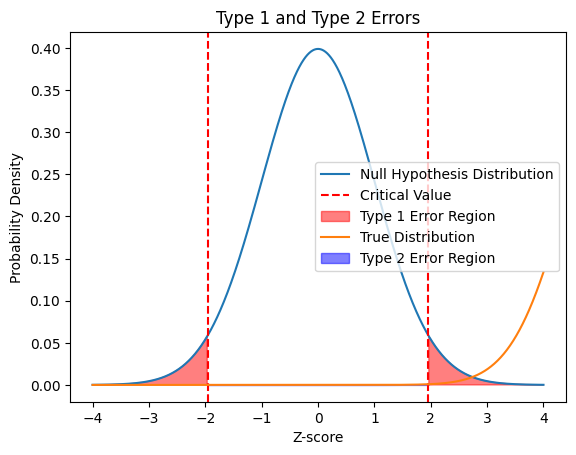

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(true_mean, sample_mean, sample_std, sample_size, alpha=0.05):
    # Calculate critical value for Type 1 error
    critical_value = norm.ppf(1 - alpha / 2)  # Two-tailed test

    # Type 1 error region
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x)
    plt.plot(x, y, label="Null Hypothesis Distribution")
    plt.axvline(critical_value, color="red", linestyle="--", label="Critical Value")
    plt.axvline(-critical_value, color="red", linestyle="--")
    plt.fill_between(x, y, where=(x >= critical_value) | (x <= -critical_value), color="red", alpha=0.5, label="Type 1 Error Region")

    # Type 2 error region
    true_dist = norm(loc=(true_mean - sample_mean) / (sample_std / np.sqrt(sample_size)), scale=1)
    plt.plot(x, true_dist.pdf(x), label="True Distribution")
    plt.fill_between(x, true_dist.pdf(x), where=(x >= -critical_value) & (x <= critical_value), color="blue", alpha=0.5, label="Type 2 Error Region")

    plt.title("Type 1 and Type 2 Errors")
    plt.xlabel("Z-score")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

# Example usage
visualize_errors(true_mean=1, sample_mean=0, sample_std=1, sample_size=30)

In [12]:
#6. Write a Python program to perform an independent T-test and interpret the results


In [13]:
from scipy.stats import ttest_ind

# Two independent samples
sample1 = [23, 25, 28, 22, 24, 27, 26, 25, 24, 23]
sample2 = [21, 22, 20, 23, 24, 22, 21, 20, 23, 22]

# Perform independent t-test
t_stat, p_value = ttest_ind(sample1, sample2)

# Interpret results
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of the two samples are not significantly different.")

T-statistic: 3.983456354511979
P-value: 0.0008713529131296017
Reject the null hypothesis: The means of the two samples are significantly different.


In [14]:
#7. Perform a paired sample T-test using Python and visualize the comparison results


C:\Users\Virat banna\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


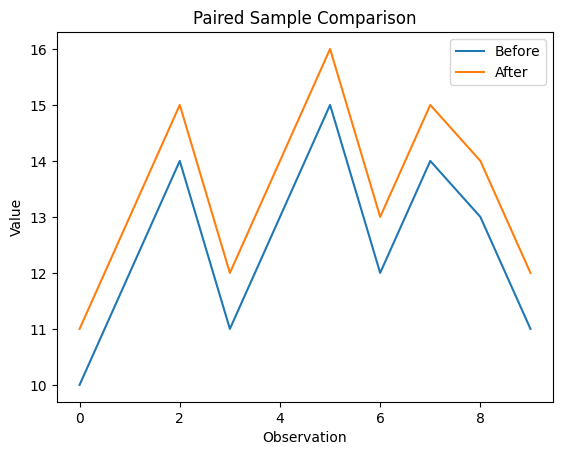

T-statistic: -inf
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the paired samples.


In [15]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Paired samples
before = [10, 12, 14, 11, 13, 15, 12, 14, 13, 11]
after = [11, 13, 15, 12, 14, 16, 13, 15, 14, 12]

# Perform paired t-test
t_stat, p_value = ttest_rel(before, after)

# Visualize comparison
plt.plot(before, label="Before")
plt.plot(after, label="After")
plt.title("Paired Sample Comparison")
plt.xlabel("Observation")
plt.ylabel("Value")
plt.legend()
plt.show()

# Interpret results
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the paired samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the paired samples.")

In [16]:
#8. Simulate data and perform both Z-test and T-test, then compare the results using Python

In [17]:
import numpy as np
from scipy.stats import ttest_1samp, norm

# Simulate data
np.random.seed(42)
sample_data = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, Sample size=30
population_mean = 50
population_std = 10  # Known population standard deviation

# Z-test
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))

# T-test
t_stat, p_value_t = ttest_1samp(sample_data, population_mean)

# Compare results
print(f"Z-test P-value: {p_value_z}")
print(f"T-test P-value: {p_value_t}")
if p_value_z < 0.05:
    print("Z-test: Reject the null hypothesis.")
else:
    print("Z-test: Fail to reject the null hypothesis.")
if p_value_t < 0.05:
    print("T-test: Reject the null hypothesis.")
else:
    print("T-test: Fail to reject the null hypothesis.")

Z-test P-value: 0.3027645658813325
T-test P-value: 0.2615641461880146
Z-test: Fail to reject the null hypothesis.
T-test: Fail to reject the null hypothesis.


In [18]:
#9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance

In [19]:
import numpy as np
from scipy.stats import t

def confidence_interval(data, confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
    sample_size = len(data)
    alpha = 1 - confidence
    t_critical = t.ppf(1 - alpha / 2, df=sample_size - 1)  # Two-tailed t-critical value
    margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return (lower_bound, upper_bound)

# Example usage
data = [23, 25, 28, 22, 24, 27, 26, 25, 24, 23]
ci = confidence_interval(data)
print(f"95% Confidence Interval: {ci}")

95% Confidence Interval: (23.349004085681756, 26.050995914318243)


In [20]:
#10. Write a Python program to calculate the margin of error for a given confidence level using sample data

In [21]:
import numpy as np
from scipy.stats import t

def margin_of_error(data, confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
    sample_size = len(data)
    alpha = 1 - confidence
    t_critical = t.ppf(1 - alpha / 2, df=sample_size - 1)  # Two-tailed t-critical value
    margin_error = t_critical * (sample_std / np.sqrt(sample_size))
    return margin_error

# Example usage
data = [23, 25, 28, 22, 24, 27, 26, 25, 24, 23]
confidence_level = 0.95
me = margin_of_error(data, confidence_level)
print(f"Margin of Error: {me}")

Margin of Error: 1.3509959143182428


In [22]:
#11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process

In [23]:
# Bayesian inference example: Updating the probability of a hypothesis given new evidence

# Prior probability (initial belief)
prior_prob = 0.5  # P(Hypothesis)

# Likelihood (probability of evidence given the hypothesis)
likelihood = 0.7  # P(Evidence | Hypothesis)

# Marginal likelihood (probability of evidence)
marginal_likelihood = 0.6  # P(Evidence)

# Bayes' Theorem: P(Hypothesis | Evidence) = [P(Evidence | Hypothesis) * P(Hypothesis)] / P(Evidence)
posterior_prob = (likelihood * prior_prob) / marginal_likelihood

print(f"Posterior Probability: {posterior_prob}")

Posterior Probability: 0.5833333333333334


In [24]:
#12 Perform a Chi-square test for independence between two categorical variables in Python

In [25]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table (observed frequencies)
observed = np.array([[10, 20, 30], [6, 15, 25]])

# Perform Chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(observed)

# Interpret results
alpha = 0.05
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent.")
else:
    print("Fail to reject the null hypothesis: The variables are independent.")

Chi-square statistic: 0.32545172219085255
P-value: 0.8498241263395327
Fail to reject the null hypothesis: The variables are independent.


In [27]:
#13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data

In [26]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table (observed frequencies)
observed = np.array([[10, 20, 30], [6, 15, 25]])

# Calculate expected frequencies
chi2, p_value, dof, expected = chi2_contingency(observed)

print("Observed Frequencies:")
print(observed)
print("Expected Frequencies:")
print(expected)

Observed Frequencies:
[[10 20 30]
 [ 6 15 25]]
Expected Frequencies:
[[ 9.05660377 19.81132075 31.13207547]
 [ 6.94339623 15.18867925 23.86792453]]


In [28]:
#14.Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution

In [29]:
from scipy.stats import chisquare

# Observed frequencies
observed = [20, 30, 25, 25]

# Expected frequencies (uniform distribution)
expected = [25, 25, 25, 25]

# Perform Chi-square goodness-of-fit test
chi2, p_value = chisquare(observed, expected)

# Interpret results
alpha = 0.05
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The observed data does not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed data fits the expected distribution.")

Chi-square statistic: 2.0
P-value: 0.5724067044708798
Fail to reject the null hypothesis: The observed data fits the expected distribution.


In [30]:
#15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics

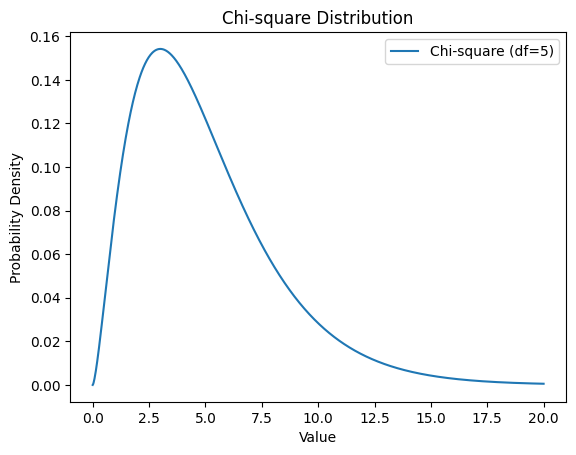

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Degrees of freedom
df = 5

# Simulate Chi-square distribution
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

# Plot Chi-square distribution
plt.plot(x, y, label=f"Chi-square (df={df})")
plt.title("Chi-square Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [33]:
##16. Implement an F-test using Python to compare the variances of two random samples

In [32]:
from scipy.stats import f_oneway

# Two random samples
sample1 = [23, 25, 28, 22, 24, 27, 26, 25, 24, 23]
sample2 = [21, 22, 20, 23, 24, 22, 21, 20, 23, 22]

# Perform F-test
f_stat, p_value = f_oneway(sample1, sample2)

# Interpret results
alpha = 0.05
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")

F-statistic: 15.867924528301884
P-value: 0.0008713529131295989
Reject the null hypothesis: The variances are significantly different.


In [34]:
#17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results

In [35]:
from scipy.stats import f_oneway

# Three groups of data
group1 = [23, 25, 28, 22, 24]
group2 = [21, 22, 20, 23, 24]
group3 = [19, 20, 18, 21, 22]

# Perform ANOVA test
f_stat, p_value = f_oneway(group1, group2, group3)

# Interpret results
alpha = 0.05
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: The group means are not significantly different.")

F-statistic: 7.067961165048539
P-value: 0.009368293562166374
Reject the null hypothesis: At least one group mean is significantly different.


In [37]:
#18.Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results


In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example data
data = pd.DataFrame({
    'Factor1': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B'],
    'Factor2': ['X', 'X', 'X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    'Value': [23, 25, 28, 22, 24, 27, 21, 22, 20, 23, 24, 22]
})

# Perform two-way ANOVA
model = ols('Value ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq   df         F    PR(>F)
C(Factor1)              0.750000  1.0  0.204545  0.663088
C(Factor2)             24.083333  1.0  6.568182  0.033498
C(Factor1):C(Factor2)   6.750000  1.0  1.840909  0.211887
Residual               29.333333  8.0       NaN       NaN


In [38]:
#19.Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing

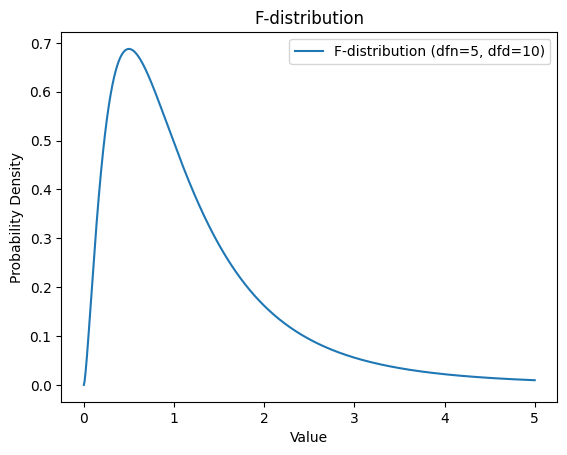

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Degrees of freedom
dfn, dfd = 5, 10  # Numerator and denominator degrees of freedom

# Simulate F-distribution
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y, label=f"F-distribution (dfn={dfn}, dfd={dfd})")
plt.title("F-distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [40]:
#20.Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means

C:\Users\Virat banna\AppData\Local\Temp\ipykernel_24180\429287620.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


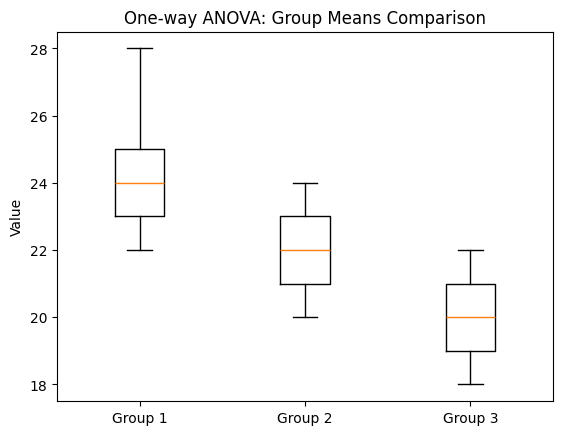

F-statistic: 7.067961165048539
P-value: 0.009368293562166374
Reject the null hypothesis: At least one group mean is significantly different.


In [41]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Three groups of data
group1 = [23, 25, 28, 22, 24]
group2 = [21, 22, 20, 23, 24]
group3 = [19, 20, 18, 21, 22]

# Perform ANOVA test
f_stat, p_value = f_oneway(group1, group2, group3)

# Plot group means
plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.title("One-way ANOVA: Group Means Comparison")
plt.ylabel("Value")
plt.show()

# Interpret results
alpha = 0.05
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: The group means are not significantly different.")

In [43]:
#21. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means

In [42]:
import numpy as np
from scipy.stats import ttest_1samp

# Simulate random data
np.random.seed(42)
sample_data = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, Sample size=30
population_mean = 50

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Interpret results
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

T-statistic: -1.145017367038331
P-value: 0.2615641461880146
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [44]:
#22. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results

In [45]:
from scipy.stats import chi2

# Sample data
sample_data = [23, 25, 28, 22, 24, 27, 26, 25, 24, 23]
sample_variance = np.var(sample_data, ddof=1)  # Sample variance
sample_size = len(sample_data)
population_variance = 4  # Hypothesized population variance

# Chi-square test statistic
chi2_stat = (sample_size - 1) * sample_variance / population_variance

# P-value for two-tailed test
p_value = 2 * min(chi2.cdf(chi2_stat, df=sample_size - 1), 1 - chi2.cdf(chi2_stat, df=sample_size - 1))

# Interpret results
alpha = 0.05
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The population variance is significantly different.")
else:
    print("Fail to reject the null hypothesis: The population variance is not significantly different.")

Chi-square statistic: 8.025
P-value: 0.936742410893561
Fail to reject the null hypothesis: The population variance is not significantly different.


In [47]:
#23. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups

In [48]:
from statsmodels.stats.proportion import proportions_ztest

# Example data
successes = [30, 40]  # Number of successes in each group
nobs = [100, 150]  # Total number of observations in each group

# Perform Z-test for proportions
z_stat, p_value = proportions_ztest(successes, nobs)

# Interpret results
alpha = 0.05
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The proportions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The proportions are not significantly different.")

Z-statistic: 0.575054632785295
P-value: 0.5652543488803401
Fail to reject the null hypothesis: The proportions are not significantly different.


In [49]:
#24. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results

In [50]:
from scipy.stats import f

# Two datasets
data1 = [23, 25, 28, 22, 24]
data2 = [21, 22, 20, 23, 24]

# Calculate variances
var1 = np.var(data1, ddof=1)
var2 = np.var(data2, ddof=1)

# F-test statistic
f_stat = var1 / var2

# P-value for two-tailed test
df1, df2 = len(data1) - 1, len(data2) - 1
p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

# Interpret results
alpha = 0.05
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")

F-statistic: 2.12
P-value: 0.4846676444309579
Fail to reject the null hypothesis: The variances are not significantly different.
